In [1]:
#from sklearn import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
#import time
from sklearn.metrics import confusion_matrix
import numpy as np

#start = time.process_time()

train = pd.read_excel('traindata.xlsx', header = 0)
train = train[0:4000]
X_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]
model = KNeighborsClassifier(n_neighbors = 17)
model.fit(X_train, y_train)
#end = time.process_time()
#print("Training time: ", end-start)

KNeighborsClassifier(n_neighbors=17)

In [2]:
#start = time.process_time()
test = pd.read_excel('testdata.xlsx', header = 0)
test = test[0:1000]
X_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]
y_pred = model.predict(X_test)
cm2 = confusion_matrix(y_test, y_pred)
#end = time.process_time()
#print("Detect time: ", end-start)
print(cm2)

[[ 22 266]
 [ 35 677]]


In [3]:
TPR2 = np.sum(cm2[1:,1:])/np.sum(cm2[1:,:])
FPR2 = np.sum(cm2[1:,0])/np.sum(cm2[0,:])
Precision2 = np.sum(cm2[1:,1:])/np.sum(cm2[:,1:])
TNR2 = cm2[0,0]/np.sum(cm2[0,:])
FNR2 = np.sum(cm2[1:,0]/np.sum(cm2[1:,:]))
F12 = 2*Precision2*TPR2/(Precision2+TPR2)
Acc2 = np.sum(np.diag(cm2))/np.sum(cm2)

In [4]:
print("Acc = ",Acc2)
print("Precision = ",Precision2)
print("F1 = ", F12)

Acc =  0.699
Precision =  0.7179215270413574
F1 =  0.8181268882175227


# SHAP


In [5]:
import shap

shap.initjs()
explainer = shap.Explainer(model.predict, X_train[0:100])
shap_values = explainer(X_test[0:50])

Permutation explainer: 51it [1:48:59, 130.79s/it]                                                                      


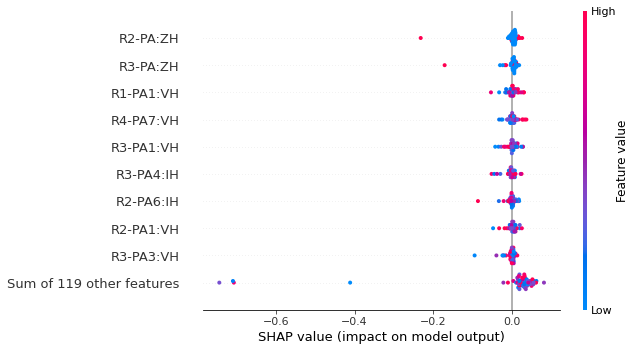

In [6]:
shap.plots.beeswarm(shap_values)

In [8]:
ind = 49
shap.plots.force(shap_values[ind])

In [19]:
ind = 0
shap.plots.force(shap_values[ind])

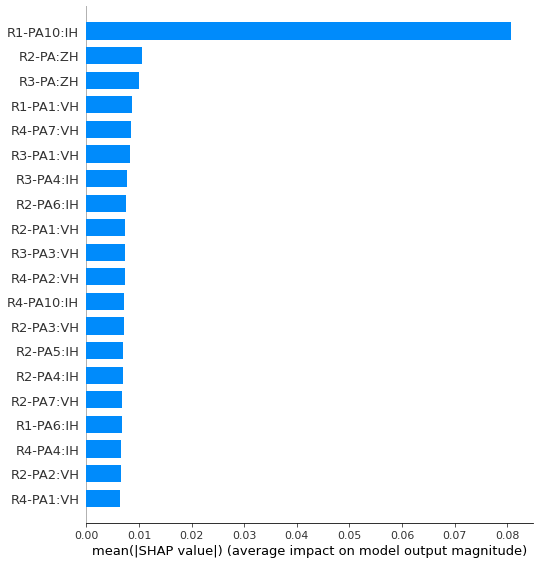

In [10]:
shap.summary_plot(shap_values, X_train.values, plot_type="bar", feature_names = X_train.columns)

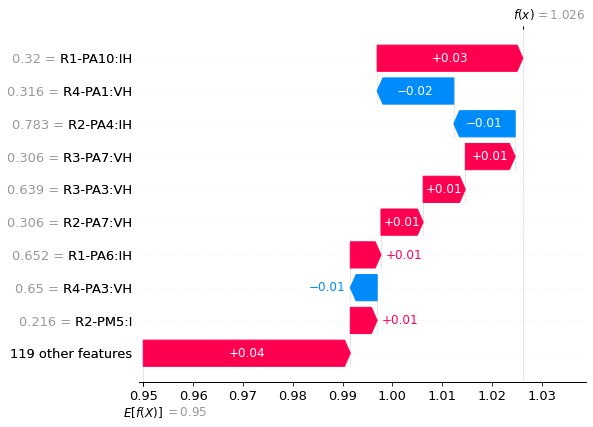

In [21]:
shap.plots.waterfall(shap_values[0])

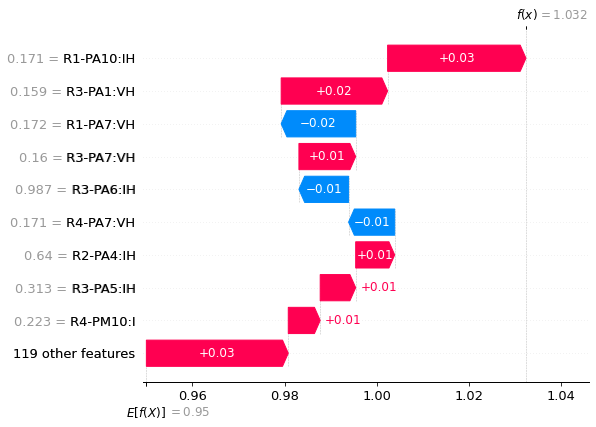

In [22]:
shap.plots.waterfall(shap_values[49])

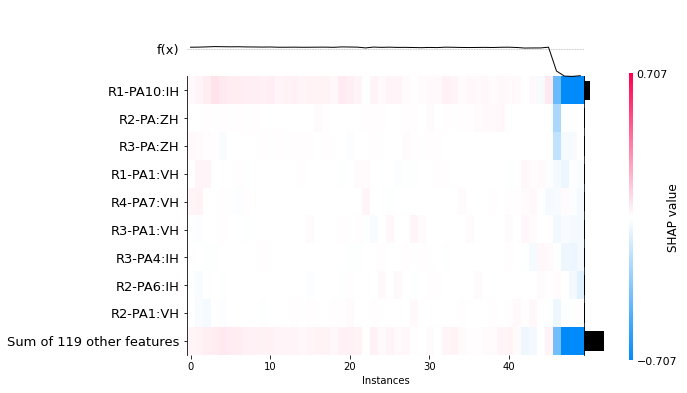

In [12]:
shap.plots.heatmap(shap_values)